In [4]:
from pfs.lam.archiverConf import getConf, extractData, colors
import numpy as np
from matplotlib.dates import num2date, date2num
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def cooler_lift(T_tip, W_cooler, T_0=40.8022826, T_1=100., W_0=240., k=30.9095981, m=-0.3734864, n=0.07916974):
    return (T_tip-T_0)/(T_1-T_0)*k*((W_cooler/W_0)+m*(W_cooler/W_0)**2+n*(W_cooler/W_0)**3)

def cryoP(t, a=10.285, b=2637.006):
    return 10**(a - (b / t))

def cryoT(p, a=10.285, b=2637.006):
    return b / (a - np.log10(p))

In [31]:
dbname='archiver_2015'

In [32]:
start = '2018-12-20 14:30'
end = '2018-12-21 09:05'

In [33]:
d = getConf(start, actors=['xcu_b1'], dbname=dbname)

xcu_b1__coolerloop : val1,p,i,d
xcu_b1__coolerstatus : state,errormask,minpower,maxpower,power
xcu_b1__coolertemps : setpoint,reject,tip,power
xcu_b1__gatevalve : position
xcu_b1__ionpump1 : temperature,pressure
xcu_b1__ionpump1errors : errormask,errorstate
xcu_b1__ionpump2 : temperature,pressure
xcu_b1__ionpump2errors : errormask,errorstate
xcu_b1__powermask : val1
xcu_b1__pressure : Pressure
xcu_b1__sampower : enabled
xcu_b1__temps : Detector Box,Mangin,Rod C,Thermal Spreader Assy,Front Ring,Detector Strap 0,Detector Strap 1
xcu_b1__turbospeed : Speed
xcu_b1__turbostatus : flags
xcu_b1__turbotemps : bodytemp,controllertemp
xcu_b1__turbovaw : voltage,current,power


In [34]:
tables = ['xcu_b1__pressure', 'xcu_b1__coolertemps', 'xcu_b1__temps']

In [35]:
df = extractData(tables, start, end, interpolate='linear',  dbname=dbname)

In [36]:
df.columns

Index(['tai', 'Pressure', 'setpoint', 'reject', 'tip', 'power', 'Detector Box',
       'Mangin', 'Rod C', 'Thermal Spreader Assy', 'Front Ring',
       'Detector Strap 0', 'Detector Strap 1', 'date'],
      dtype='object')

In [37]:
df['lift'] = cooler_lift(df.tip, df.power)

In [38]:
df['cryop'] = cryoP(df['Thermal Spreader Assy'])
df['cryot'] = cryoT(df['Pressure'])

/software/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


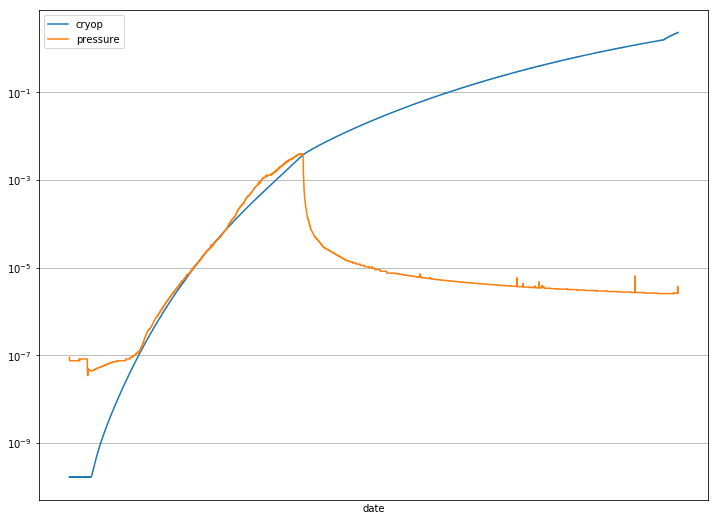

In [27]:
ax = df.set_index('date')[['cryop']].plot(figsize=(12, 10), grid=True, legend=True)
ax.set_yscale('log')

ax.semilogx(df.tai, df['Pressure'], label='pressure')
ax.legend()

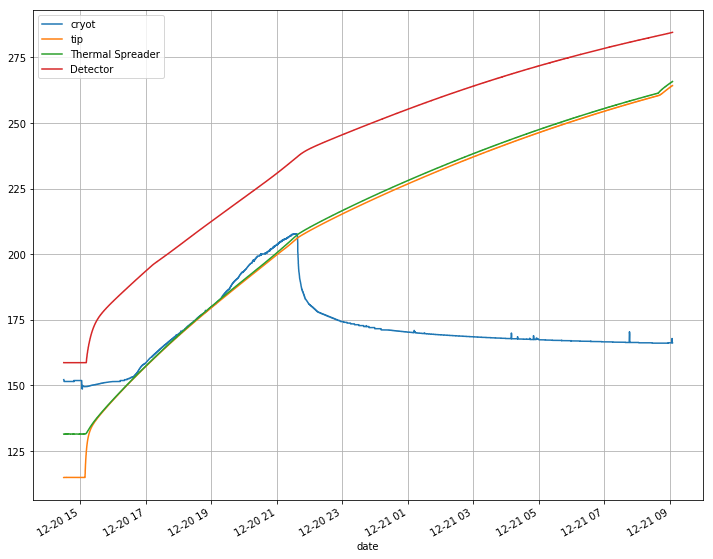

In [42]:
ax = df.set_index('date')[['cryot']].plot(figsize=(12, 10), grid=True, legend=True)

ax.plot(df.tai, df['tip'], label='tip')
ax.plot(df.tai, df['Thermal Spreader Assy'], label='Thermal Spreader')
ax.plot(df.tai, df['Detector Strap 1'], label='Detector')
ax.legend()